In [1]:
import act
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [32]:
# Set your username and token here!
username = 'iregmisid'
token = '26f7cf8ad4fd7e12'

# Set the datastream and start/enddates
datastream_ecor = 'bnfecorsfS20.b1'
datastream_sebs = 'bnfsebsS20.b1'
datastream_sirs = 'bnfsirsS20.b1'
startdate = '2024-04-01T00:00:00'
enddate = '2025-04-30T23:59:59'

# Use ACT to easily download the data.  Watch for the data citation!  Show some support
# for ARM's instrument experts and cite their data if you use it in a publication
result_ecor = act.discovery.download_arm_data(username, token, datastream_ecor, startdate, enddate)
result_sebs = act.discovery.download_arm_data(username, token, datastream_sebs, startdate, enddate)
result_sirs = act.discovery.download_arm_data(username, token, datastream_sirs, startdate, enddate)



[DOWNLOADING] bnfecorsfS20.b1.20250303.000000.nc
[DOWNLOADING] bnfecorsfS20.b1.20250419.000000.nc
[DOWNLOADING] bnfecorsfS20.b1.20241020.000000.nc
[DOWNLOADING] bnfecorsfS20.b1.20250410.000000.nc
[DOWNLOADING] bnfecorsfS20.b1.20241121.000000.nc
[DOWNLOADING] bnfecorsfS20.b1.20250430.000000.nc
[DOWNLOADING] bnfecorsfS20.b1.20250227.000000.nc
[DOWNLOADING] bnfecorsfS20.b1.20250323.000000.nc
[DOWNLOADING] bnfecorsfS20.b1.20241019.000000.nc
[DOWNLOADING] bnfecorsfS20.b1.20241027.000000.nc
[DOWNLOADING] bnfecorsfS20.b1.20241024.000000.nc
[DOWNLOADING] bnfecorsfS20.b1.20250118.000000.nc
[DOWNLOADING] bnfecorsfS20.b1.20250327.000000.nc
[DOWNLOADING] bnfecorsfS20.b1.20250114.000000.nc
[DOWNLOADING] bnfecorsfS20.b1.20250223.000000.nc
[DOWNLOADING] bnfecorsfS20.b1.20250417.000000.nc
[DOWNLOADING] bnfecorsfS20.b1.20241211.000000.nc
[DOWNLOADING] bnfecorsfS20.b1.20250324.000000.nc
[DOWNLOADING] bnfecorsfS20.b1.20250220.000000.nc
[DOWNLOADING] bnfecorsfS20.b1.20250411.000000.nc
[DOWNLOADING] bnfeco

In [24]:
ds_ecor = act.io.read_arm_netcdf(result_ecor)
ds_sebs = act.io.read_arm_netcdf(result_sebs)
ds_sirs = act.io.read_arm_netcdf(result_sirs)

ds_sebs


<xarray.Dataset> Size: 444kB
Dimensions:                        (time: 1440, bound: 2)
Coordinates:
  * time                           (time) datetime64[ns] 12kB 2025-04-01 ... ...
Dimensions without coordinates: bound
Data variables: (12/70)
    base_time                      (time) datetime64[ns] 12kB 2025-04-01 ... ...
    time_offset                    (time) datetime64[ns] 12kB 2025-04-01 ... ...
    time_bounds                    (time, bound) object 23kB dask.array<chunksize=(48, 2), meta=np.ndarray>
    down_short_hemisp              (time) float32 6kB dask.array<chunksize=(48,), meta=np.ndarray>
    qc_down_short_hemisp           (time) int32 6kB dask.array<chunksize=(48,), meta=np.ndarray>
    up_short_hemisp                (time) float32 6kB dask.array<chunksize=(48,), meta=np.ndarray>
    ...                             ...
    qc_temp_net_radiometer         (time) int32 6kB dask.array<chunksize=(48,), meta=np.ndarray>
    battery_voltage                (time) float32 6kB dask.array<chunksize=(48,), meta=np.ndarray>
    qc_battery_voltage             (time) int32 6kB dask.array<chunksize=(48,), meta=np.ndarray>
    lat                            (time) float32 6kB 34.65 34.65 ... 34.65
    lon                            (time) float32 6kB -87.29 -87.29 ... -87.29
    alt                            (time) float32 6kB 178.0 178.0 ... 178.0
Attributes: (12/33)
    command_line:            sebs_ingest -s bnf -f S20 --max-runtime 0
    Conventions:             ARM-1.3
    process_version:         ingest-sebs-1.9-0.el9
    dod_version:             sebs-b1-1.6
    input_source:            /data/collection/bnf/bnfsebsS20.00/SEBS_Table30....
    site_id:                 bnf
    ...                      ...
    qc_bit_3_assessment:     Bad
    history:                 created by user armflowprod on machine prod-slur...
    _file_dates:             ['20250401', '20250402', '20250403', '20250404',...
    _file_times:             ['000000', '000000', '000000', '000000', '000000...
    _datastream:             bnfsebsS20.b1
    _arm_standards_flag:     1

In [28]:
#enegry_balance_closure
# Calculate Turbulent Energy Flux (TE)
TE = (ds_ecor['sensible_heat_flux'] + ds_ecor['latent_flux'])

Rn = (ds_sirs['down_long_hemisp1'] + ds_sirs['down_short_hemisp'])- (ds_sirs['up_long_hemisp'] + ds_sirs['up_short_hemisp'])
NetR

G= ds_sebs['surface_soil_heat_flux_avg']





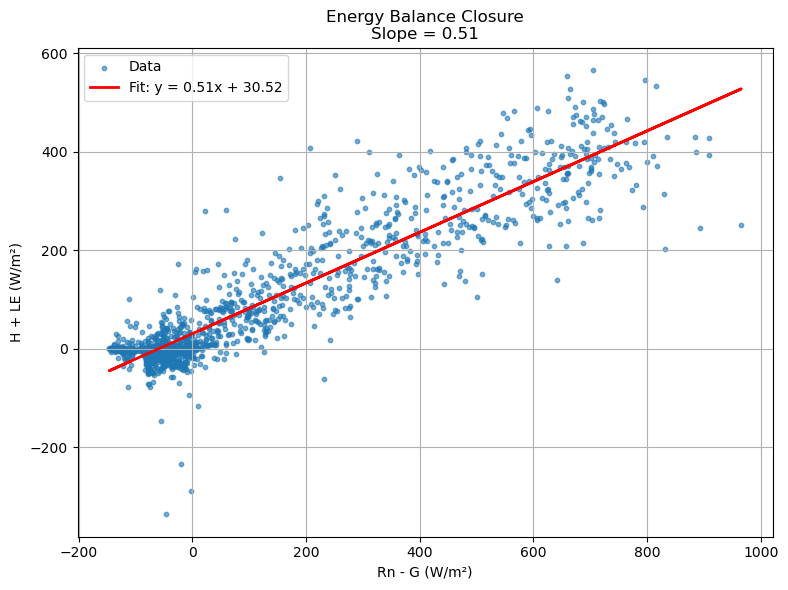

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Calculate variables
TE = ds_ecor['sensible_heat_flux'] + ds_ecor['latent_flux']
Rn = (ds_sirs['down_long_hemisp1'] + ds_sirs['down_short_hemisp']) - (ds_sirs['up_long_hemisp'] + ds_sirs['up_short_hemisp'])
G = ds_sebs['surface_soil_heat_flux_avg']
available_energy = Rn - G

# Align datasets on common coordinates (e.g., time)
TE, available_energy = xr.align(TE, available_energy, join='inner')

# Convert to NumPy arrays
x = available_energy.values
y = TE.values

# Remove NaNs
valid = ~np.isnan(x) & ~np.isnan(y)
x_clean = x[valid]
y_clean = y[valid]

# Linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_clean, y_clean)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(x_clean, y_clean, s=10, alpha=0.6, label='Data')
plt.plot(x_clean, intercept + slope * x_clean, color='red', linewidth=2, label=f'Fit: y = {slope:.2f}x + {intercept:.2f}')
plt.xlabel('Rn - G (W/m²)')
plt.ylabel('H + LE (W/m²)')
plt.title(f'Energy Balance Closure\nSlope = {slope:.2f}')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


ConnectTimeout: HTTPSConnectionPool(host='dqr-web-service.svcs.arm.gov', port=443): Max retries exceeded with url: /dqr_full/bnfecorsfS20.b1/20250401/20250430/incorrect,suspect (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x7f477f089090>, 'Connection to dqr-web-service.svcs.arm.gov timed out. (connect timeout=None)'))

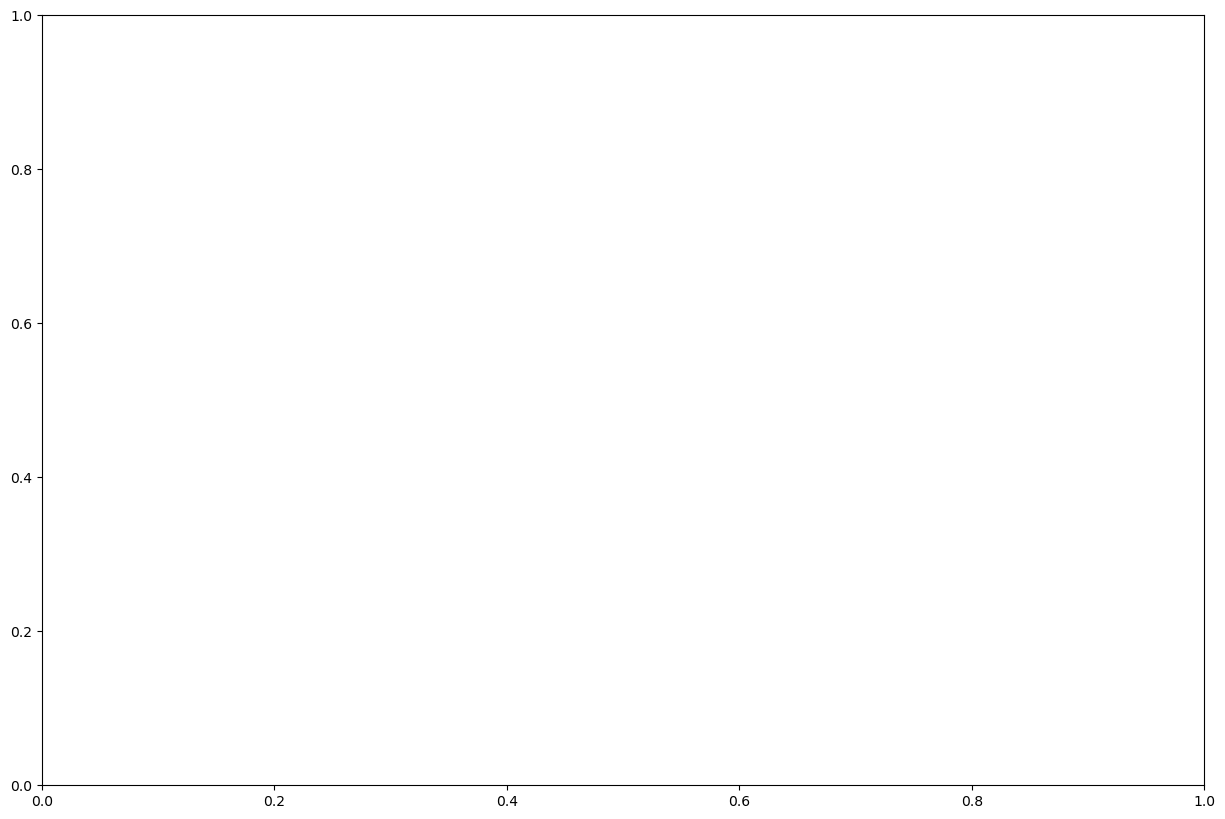

In [23]:
# Create a plotting display object with 2 plots
display = act.plotting.TimeSeriesDisplay(ds_ecor, figsize=(15, 10))
co2_flux ='co2_flux'
TE= 'TE'

ds_ecor = act.qc.add_dqr_to_qc(ds_ecor, variable=co2_flux)
display.plot(co2_flux, subplot_index=(0,))
# Add y-axis label with units (e.g., µmol CO₂ m⁻² s⁻¹)
display.axes[0].set_ylabel('CO₂ Flux (µmol m⁻² s⁻¹)')

/opt/conda/lib/python3.11/site-packages/act/plotting/windrosedisplay.py:358: RuntimeWarning: Mean of empty slice
  arr.append(np.nanmean(data[idx]))


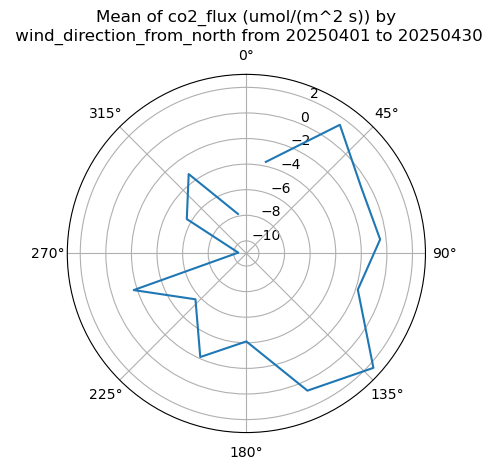

In [26]:
#display = act.plotting.TimeSeriesDisplay(ds_ecor, figsize=(15, 10))
#wind_direction_from_north ='wind_direction_from_north'
#ds_ecor = act.qc.add_dqr_to_qc(ds_ecor, variable=co2_flux)
#display.plot(wind_direction_from_north)

#rose_plot
display = act.plotting.WindRoseDisplay(ds_ecor)
display.plot_data('wind_direction_from_north', 'mean_wind', 'co2_flux', num_dirs=15, plot_type='line', line_plot_calc='mean')
plt.show() 



In [1]:
#rose_plot_contour
display = act.plotting.WindRoseDisplay(ds_ecor)
display.plot_data('wind_direction_from_north', 'mean_wind', 'co2_flux', num_dirs=15, plot_type='contour', contour_type='mean')
plt.savefig()
plt.show() 

NameError: name 'act' is not defined

<Axes: title={'center': 'bnfecorsfS20.b1 qc_co2_flux on 20250401'}, xlabel='Time [UTC]', ylabel='(1)'>

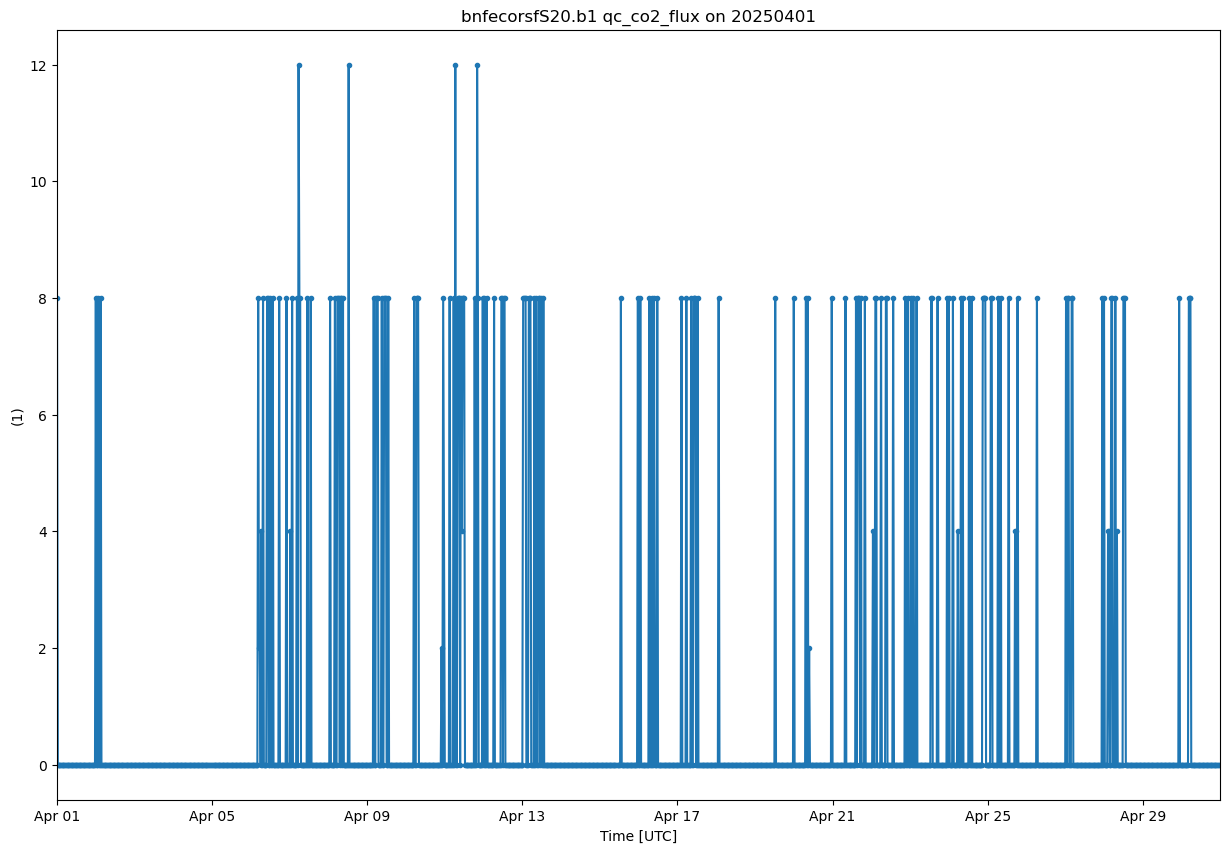

In [28]:
display = act.plotting.TimeSeriesDisplay(ds_ecor, figsize=(15, 10))
qc_co2_flux ='qc_co2_flux'
display.plot(qc_co2_flux, subplot_index=(0,))




<Axes: title={'center': 'bnfecorsfS20.b1 sensible_heat_flux on 20250430'}, xlabel='Time [UTC]', ylabel='(W/m^2)'>

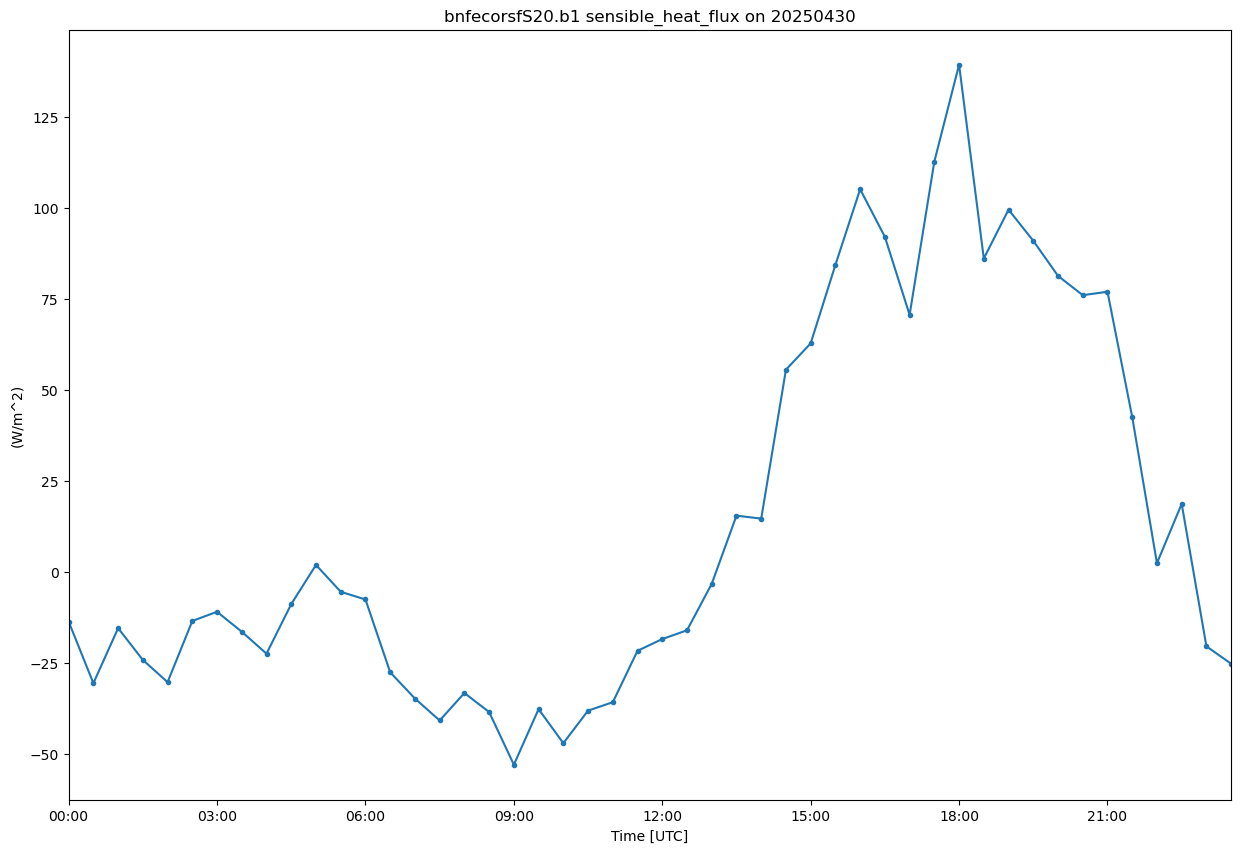

In [17]:
display = act.plotting.TimeSeriesDisplay(ds_ecor, figsize=(15, 10))
sensible_heat_flux ='sensible_heat_flux'
#ds_ecor = act.qc.add_dqr_to_qc(ds_ecor, variable=sensible_heat_flux)
display.plot(sensible_heat_flux)

In [ ]:
#Rn −G−S=H+LE   (Rn= Net radiation (Total incoming - outgoing radiation at the surface), G = Ground heat flux,  H= Sensible Heat Flux (Air), LE: Evapotranspiration Surface energy balance closure)